* Logistic Classfication은 True or False와 같은 binary 또는  복수개의 다항 분류에 쓰임

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.4.1


* x data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y data를 0과 1로 구분하는 예제임
* Logistic Classficiation을 통해 보라색과 노란색으로 y data를 구분
* Test data는 붉은 색의 위치와 같이 추론시 1의 값을 가짐

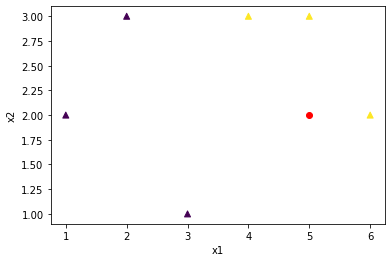

In [4]:
x_train = [[1., 2.],
           [2., 3.],
           [3., 1.],
           [4., 3.],
           [5., 3.],
           [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5., 2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Logistic Classfication 

* Tensorflow data API를 통해 학습시킬 값을 담는다(Batch Size는 한 번에 학습시킬 사이즈로 정한다
* features labels은 실제 학습에 사용될 data이며 연산을 위해 Type을 맞춘다

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

* w와 b는 학습을 통해 생성되는 모델에 쓰이는 weight와 bias으로 초깃값을 variabe 0 또는 random값으로 가능 (tf.random_normal([2,1])

In [11]:
w = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

* Sigmoid는 0과 1의 값만 반환
* tf.sigmoid(tf.matmul(x,w) + b)

In [12]:
def logistic_regression(features):
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, w) + b))

In [18]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost
                
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)          

* Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0을 반환
* 가설을 통해 실제 값과 비교한 정확도를 측정

In [19]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mena(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

* GradientTape를 통해 경사값을 계산

In [20]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features), features,labels)
    return tape.gradient(loss_value, [w,b])

* 학습을 실행
* 위 데이터를 cost 함수를 통해 학습시킨 후 모델을 생성
* 데스트 데이터로 검증 수행

In [29]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        hypothesis = logistic_regression(features)
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis, labels))
test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

SyntaxError: invalid syntax (<ipython-input-29-ecb77a32ffb3>, line 10)